In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('german_credit.csv')

In [62]:
# Check the types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [63]:
# Check if there are missing values
pd.DataFrame({'missing_values': df.isnull().sum(), 'missing_percentage': df.isnull().mean() * 100})

,missing_values,missing_percentage
Creditability,0,0.0
Account Balance,0,0.0
Duration of Credit (month),0,0.0
Payment Status of Previous Credit,0,0.0
Purpose,0,0.0
Credit Amount,0,0.0
Value Savings/Stocks,0,0.0
Length of current employment,0,0.0
Instalment per cent,0,0.0
Sex & Marital Status,0,0.0


## Data dictionary

<div align="center">
    <img src="dictionary.png" width="600" align="middle">
</div>


In [64]:
# Describe the data
df.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [65]:
# Check if there are duplicated rows
df.duplicated()[df.duplicated() == True]

Series([], dtype: bool)

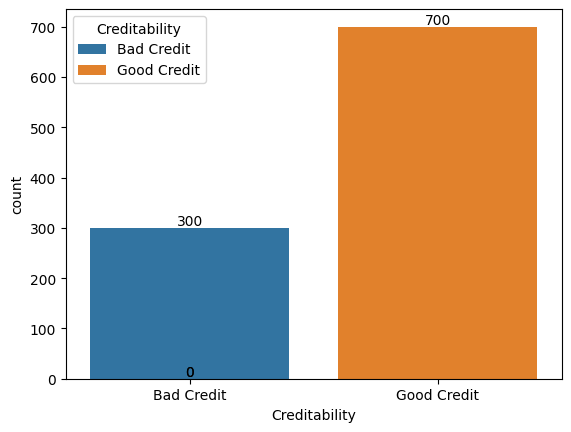

In [66]:
# --------------------------- Creditability -------------------------

# Create a count plot
plot = sns.countplot(x='Creditability', data=df, hue='Creditability', palette=['#1f77b4', '#ff7f0e'])

# Add a legend to identify what each color represents
# Each label corresponds to a different category in the 'Creditability' column
plot.legend(title='Creditability', labels=['Bad Credit', 'Good Credit'])

# Add exact counts above the bars
for patch in plot.patches:
    height = patch.get_height()  # Get the height of the bar (count)
    plot.text(
        patch.get_x() + patch.get_width() / 2.,  # X position for the text (center of the bar)
        height + 0.1,  # Y position for the text (slightly above the height of the bar)
        int(height),  # Text to display (height value)
        ha='center',  # Horizontal alignment of the text
        va='bottom',  # Vertical alignment of the text
        fontsize=10,  # Font size of the text
        color='black'  # Color of the text
    )

# Configure the x-axis labels
plot.set_xticks([0, 1])  # Define the ticks on the x-axis (for each category)
plot.set_xticklabels(['Bad Credit', 'Good Credit'])  # Set the labels for the ticks

# Display the plot
plt.show()


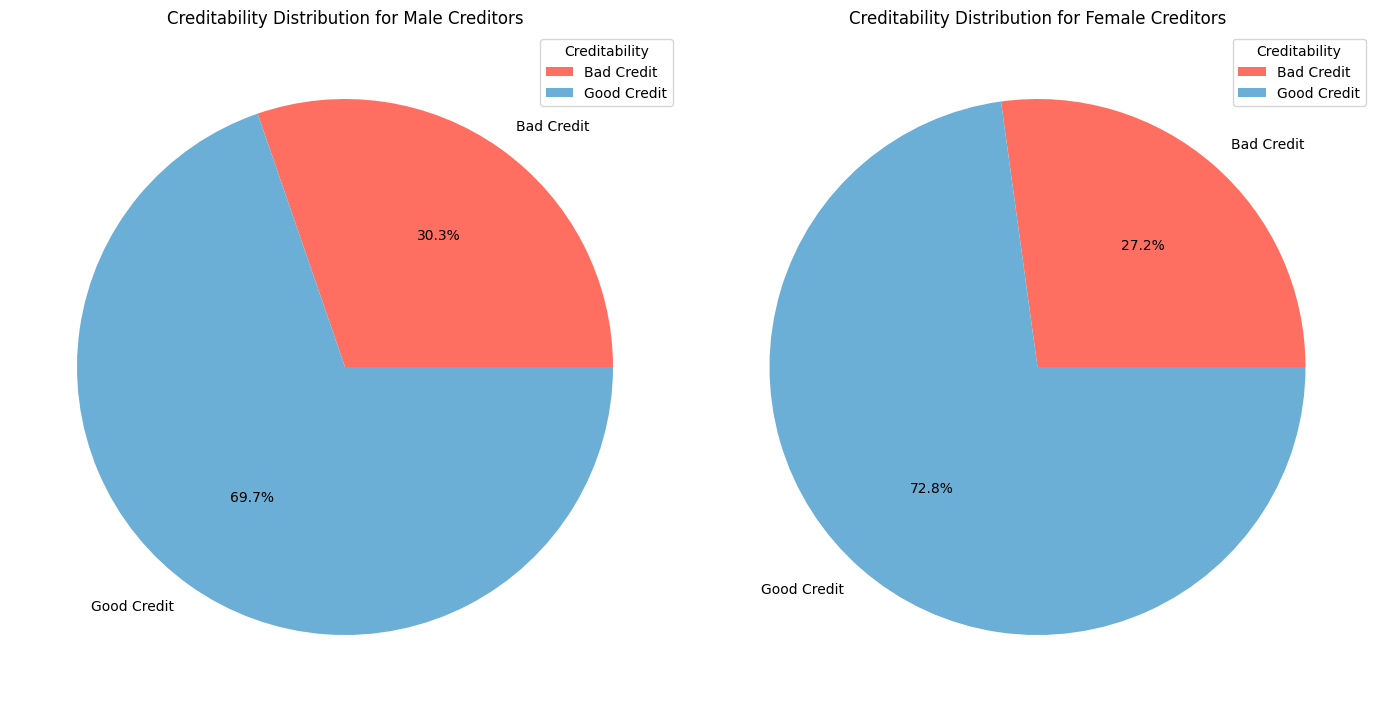

In [73]:
# --------------------------- Creditability for Male and Female -------------------------

# Assume the DataFrame df is already loaded and contains the columns 'Sex & Marital Status', 'Creditability', and other necessary columns.

# Create a new column 'Gender' to categorize the data as 'Male' or 'Female'
df['Gender'] = df['Sex & Marital Status'].map({1: 'Male', 2: 'Male', 3: 'Male', 4: 'Female'})

# Filter the data for 'Male' and 'Female'
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

# Count the number of occurrences for each 'Creditability' category for males and females
male_creditability_count = male_data.groupby('Creditability').size().reset_index(name='Count')
female_creditability_count = female_data.groupby('Creditability').size().reset_index(name='Count')

# Set the labels for the pie charts based on creditability
creditability_labels = ['Bad Credit', 'Good Credit']

# Define the colors for the slices of the pie charts
colors = ['#ff6f61', '#6baed6']  # Different colors for 'Bad Credit' and 'Good Credit'

# Set up the creation of two pie charts side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 7))  # Create a figure with two axes (charts) side by side

# Create the pie chart for male creditors
wedges_male, texts_male, autotexts_male = axes[0].pie(
    male_creditability_count['Count'],  # Data for the pie chart
    labels=creditability_labels,  # Labels for each slice
    autopct='%1.1f%%',  # Format to show percentages on the slices
    colors=colors  # Color for each slice
)

# Add a legend and title for the male chart
axes[0].legend(wedges_male, creditability_labels, title='Creditability', loc='best', fontsize='medium')
axes[0].set_title('Creditability Distribution for Male Creditors')

# Create the pie chart for female creditors
wedges_female, texts_female, autotexts_female = axes[1].pie(
    female_creditability_count['Count'],  # Data for the pie chart
    labels=creditability_labels,  # Labels for each slice
    autopct='%1.1f%%',  # Format to show percentages on the slices
    colors=colors  # Color for each slice
)

# Add a legend and title for the female chart
axes[1].legend(wedges_female, creditability_labels, title='Creditability', loc='best', fontsize='medium')
axes[1].set_title('Creditability Distribution for Female Creditors')

# Adjust the layout so that the charts do not overlap and display the charts
plt.tight_layout()  # Adjust layout for better visualization
plt.show()  # Display the charts


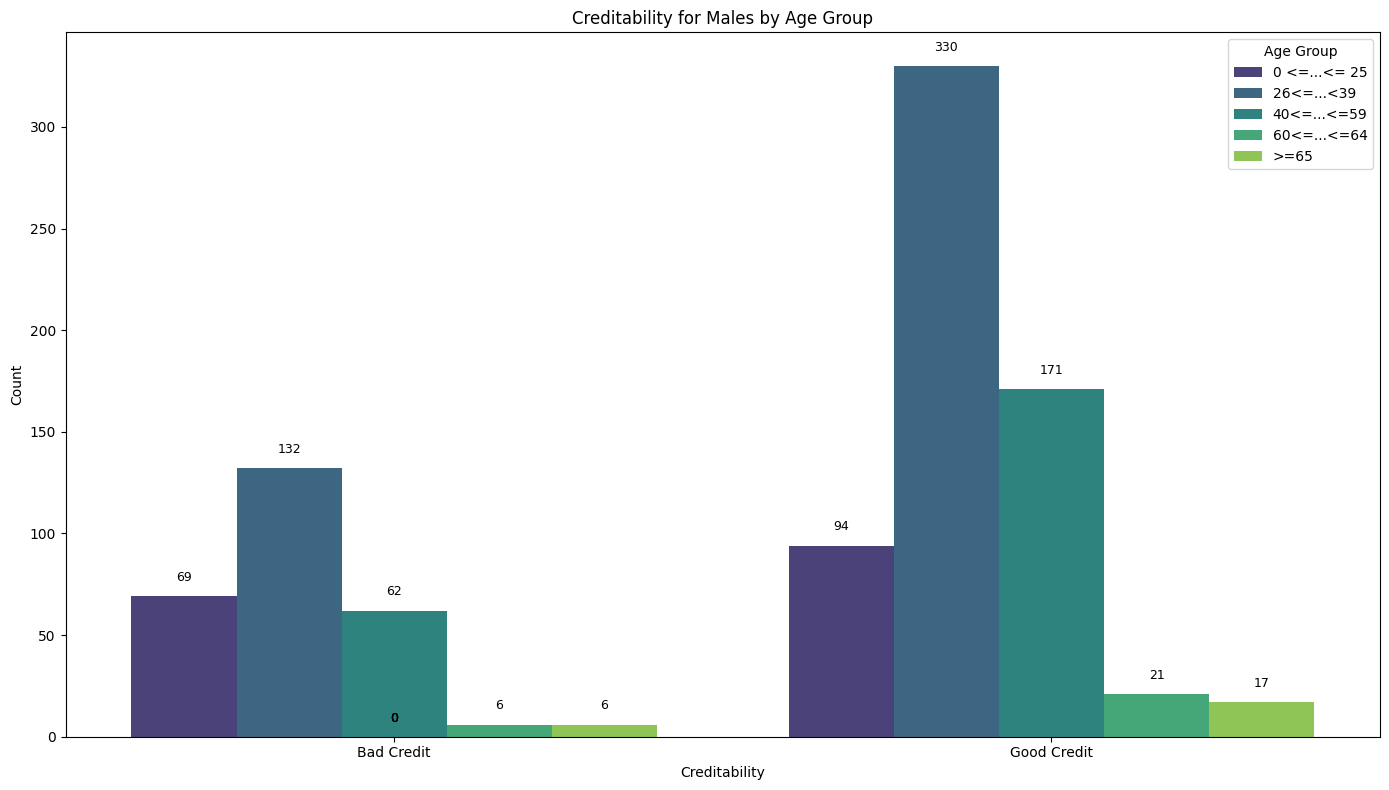

In [82]:
# ------------------------- Creditability for Males by Age Group -----------------------------

df['Gender'] = df['Sex & Marital Status'].map({1: 'Male', 2: 'Male', 3: 'Male'})  # Mapping '1', '2', '3' as 'Male'

# Create age bins and corresponding labels
age_bins = [0, 25, 39, 59, 64, 100]
age_labels = ['0 <=...<= 25', '26<=...<39', '40<=...<=59', '60<=...<=64', '>=65']
df['Age Group'] = pd.cut(df['Age (years)'], bins=age_bins, labels=age_labels)

# Filter the data to only include males
df_male = df[df['Gender'] == 'Male']

# Set the size of the figure
plt.figure(figsize=(14, 8))

# Create the count plot for 'Creditability' with 'Age Group' as hue (only for Male)
plot = sns.countplot(x='Creditability', data=df_male, hue='Age Group', palette='viridis')

# Add exact counts above the bars
for patch in plot.patches:
    height = patch.get_height()  # Get the height of each bar (count)
    plot.text(
        patch.get_x() + patch.get_width() / 2.,  # X position of the text (center of the bar)
        height + 6,  # Y position of the text (slightly above the top of the bar)
        int(height),  # Text to display (the count value)
        ha='center',  # Horizontal alignment of the text
        va='bottom',  # Vertical alignment of the text
        fontsize=9,  # Font size of the text
        color='black'  # Color of the text
    )

# Set x-axis labels for Creditability
plot.set_xticks([0, 1])  # Set the ticks for Creditability (Bad = 0, Good = 1)
plot.set_xticklabels(['Bad Credit', 'Good Credit'])  # Label the ticks

# Add title and labels to the axes
plt.title('Creditability for Males by Age Group')
plt.xlabel('Creditability')
plt.ylabel('Count')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

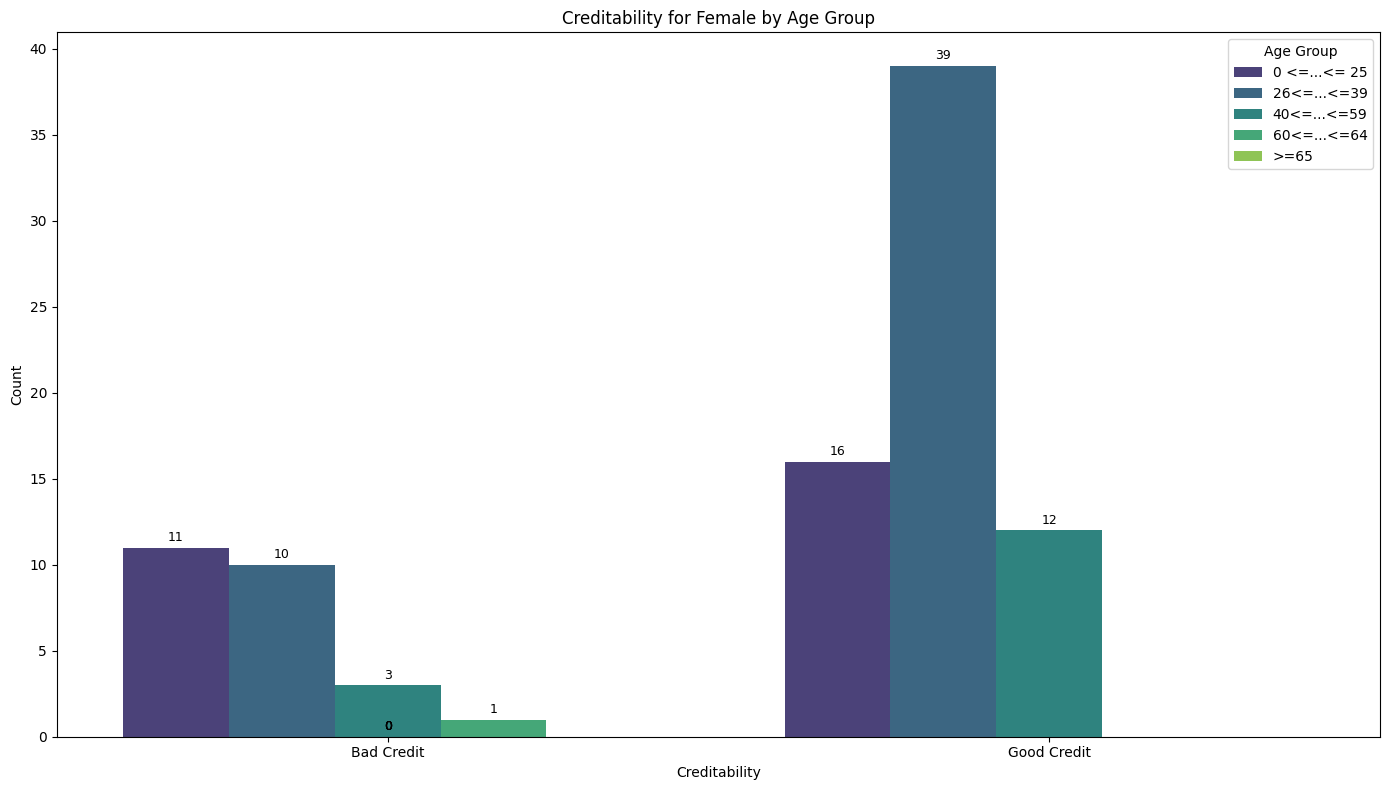

In [102]:
# --------------------- Creditability for Female by Age Group ------------------

# Categorize 'Sex & Marital Status' as 'Female' only
df['Gender'] = df['Sex & Marital Status'].map({4: 'Female'})

# Filter only the case where 'Gender' is 'Female'
female_data = df[df['Gender'] == 'Female']

# Define age bins and labels
age_bins = [0, 25, 39, 59, 64, 100]
age_labels = ['0 <=...<= 25', '26<=...<=39', '40<=...<=59', '60<=...<=64', '>=65']

# Create a new column 'Age Group' by binning the ages into the defined age ranges
df['Age Group'] = pd.cut(df['Age (years)'], bins=age_bins, labels=age_labels)

# Set the figure size for the plot
plt.figure(figsize=(14, 8))

# Create a count plot for 'Creditability' with 'Gender' as hue
plot = sns.countplot(x='Creditability', data=female_data, hue='Age Group', palette='viridis')

# Add a legend with the title 'Age Group' to distinguish age ranges
plot.legend(title='Age Group')

# Add exact counts above the bars in the count plot
for patch in plot.patches:
    height = patch.get_height()  # Get the height of each bar (i.e., count)
    plot.text(
        patch.get_x() + patch.get_width() / 2.,  # X position of the text (center of the bar)
        height + 0.2,  # Y position of the text (slightly above the top of the bar)
        int(height),  # Text to display (the count value)
        ha='center',  # Horizontal alignment of the text
        va='bottom',  # Vertical alignment of the text
        fontsize=9,  # Font size of the text
        color='black'  # Color of the text
    )

# Set x-axis tick labels with 'Creditability' categories
plot.set_xticks([0, 1])  # Define ticks for 'Creditability' (0: Bad Credit, 1: Good Credit)
plot.set_xticklabels(['Bad Credit', 'Good Credit'])  # Add labels to the ticks

# Add title and labels to the axes
plt.title('Creditability for Female by Age Group')
plt.xlabel('Creditability')
plt.ylabel('Count')

# Adjust layout for better visualization and display the plot
plt.tight_layout()
plt.show()


In [90]:
'''


# 'Sex & Marital Status' and 'Gender'

filtered_df = df[df['Sex & Marital Status'] == 4]

filtered_df = filtered_df[['Sex & Marital Status', 'Gender']]

pd.set_option('display.max_rows', None)  

filtered_df.count()

'''



Sex & Marital Status    92
Gender                   0
dtype: int64

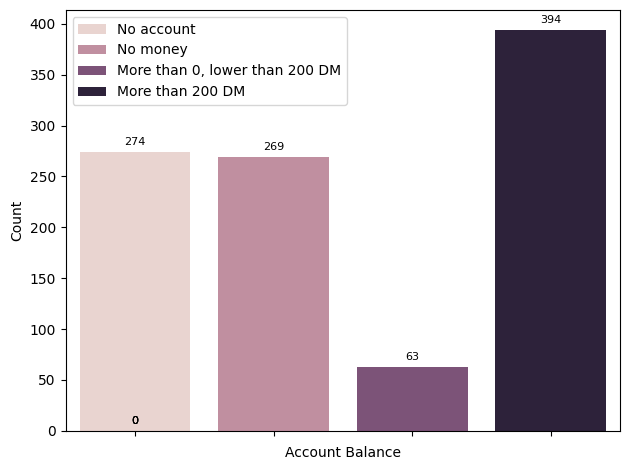

In [ ]:
# --------------------- Account Balance --------------------

# Check for duplicate rows in the DataFrame
# This helps identify any duplicate records which might affect the analysis
df.duplicated()[df.duplicated() == True]

# Create a count plot to visualize the distribution of 'Account Balance' values
# The hue parameter is set to 'Account Balance' to differentiate the counts by account balance categories
plot = sns.countplot(x='Account Balance', data=df, hue='Account Balance')

# Add a legend to the plot to indicate what each color represents
# Each label corresponds to a different category in the 'Account Balance' column
plot.legend(labels=['No account', 'No money', 'More than 0, lower than 200 DM', 'More than 200 DM'])

# Set the x-axis tick labels to be empty
# This is useful if you want to remove the default tick labels and possibly add custom ones later
plot.set_xticklabels([])

# Add exact counts above the bars in the count plot
# This provides precise values for each category in the plot
for patch in plot.patches:
    height = patch.get_height()  # Get the height of each bar (i.e., count)
    plot.text(
        patch.get_x() + patch.get_width() / 2.,  # X position of the text (center of the bar)
        height + 5,  # Y position of the text (slightly above the top of the bar)
        int(height),  # Text to display (the count value)
        ha='center',  # Horizontal alignment of the text
        va='bottom',  # Vertical alignment of the text
        fontsize=8,  # Font size of the text
        color='black'  # Color of the text
    )

# Add title and labels to the axes
# This helps in understanding what the plot represents

plt.xlabel('Account Balance')
plt.ylabel('Count')

# Display the plot
# This renders the plot and shows it in the output
plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show()


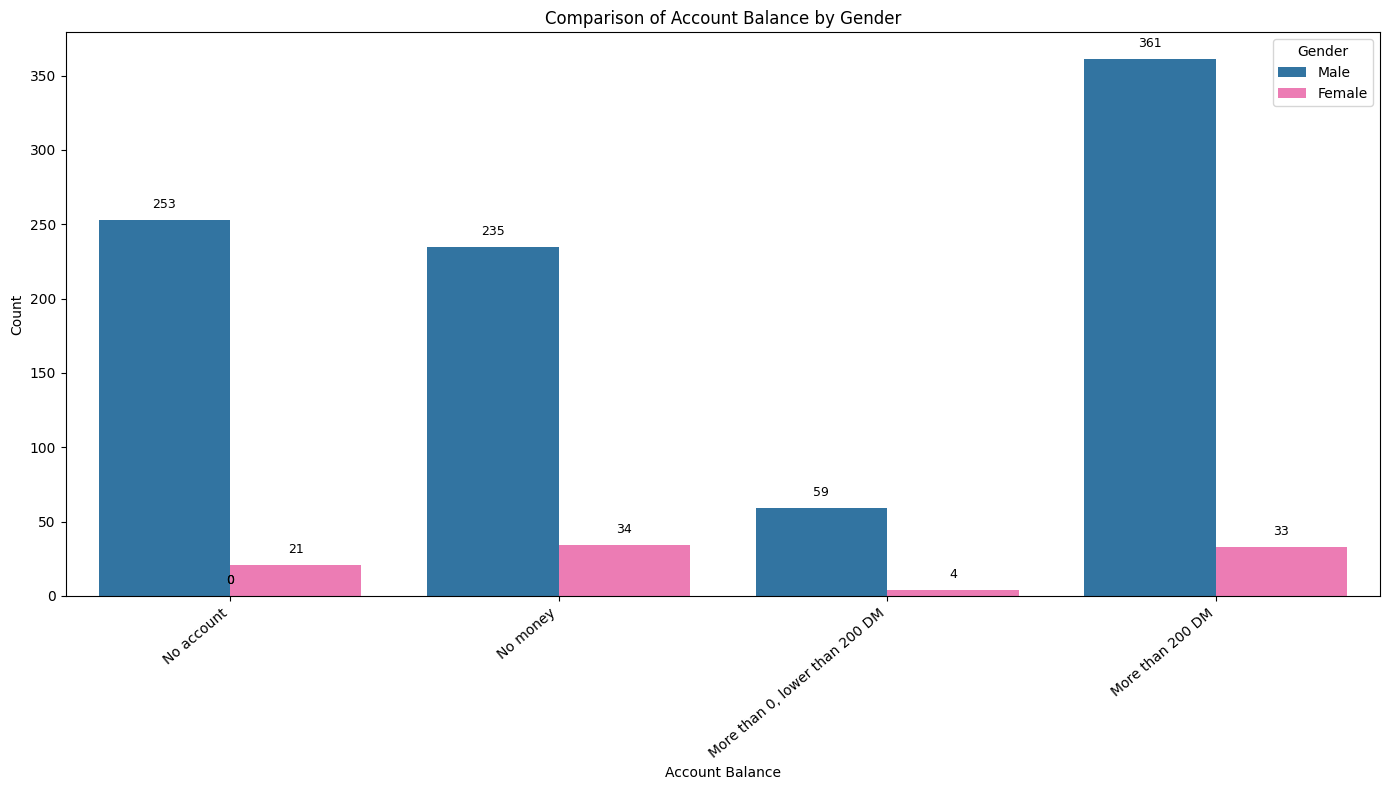

In [105]:
# ---------------------------------- Comparison of Account Balance by Gender --------------------------------------

# Remove extra spaces from column names if necessary
# This ensures that there are no leading or trailing spaces in the column names, which can cause issues
df.columns = df.columns.str.strip()

# Create a new column 'Gender'
# Map the 'Sex & Marital Status' values to gender categories
# This assumes 1, 2, 3 represent 'Male' and 4 represents 'Female'
df['Gender'] = df['Sex & Marital Status'].map({1: 'Male', 2: 'Male', 3: 'Male', 4: 'Female'})

# Define the labels for account balances
account_balance_labels = ['No account', 'No money', 'More than 0, lower than 200 DM', 'More than 200 DM']

# Create a grouped bar plot to compare 'Account Balance' by 'Gender'
# This plot shows the count of each account balance category, separated by gender
plt.figure(figsize=(14, 8))  # Set the size of the figure
plot = sns.countplot(x='Account Balance', data=df, hue='Gender', palette=['#1f77b4', '#ff69b4'])

# Add a legend to the plot to indicate what each color represents
# The legend helps identify which color corresponds to which gender
plot.legend(title='Gender', labels=['Male', 'Female'])

# Add exact counts above the bars in the count plot
# This provides precise values for each category in the plot
for patch in plot.patches:
    height = patch.get_height()  # Get the height of each bar (i.e., count)
    plot.text(
        patch.get_x() + patch.get_width() / 2.,  # X position of the text (center of the bar)
        height + 6,  # Y position of the text (slightly above the top of the bar)
        int(height),  # Text to display (the count value)
        ha='center',  # Horizontal alignment of the text
        va='bottom',  # Vertical alignment of the text
        fontsize=9,  # Font size of the text
        color='black'  # Color of the text
    )

# Configure x-axis tick labels with account balance names
# Set the number of ticks based on the number of categories and add labels with rotation for better readability
plot.set_xticks(range(len(account_balance_labels)))  # Define the number of ticks based on categories
plot.set_xticklabels(account_balance_labels, rotation=40, ha='right')  # Add labels and rotate them for better readability

# Add title and labels to the axes
# This helps in understanding what the plot represents
plt.title('Comparison of Account Balance by Gender')
plt.xlabel('Account Balance')
plt.ylabel('Count')

# Display the plot
# This renders the plot and shows it in the output
plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show()


Purpose

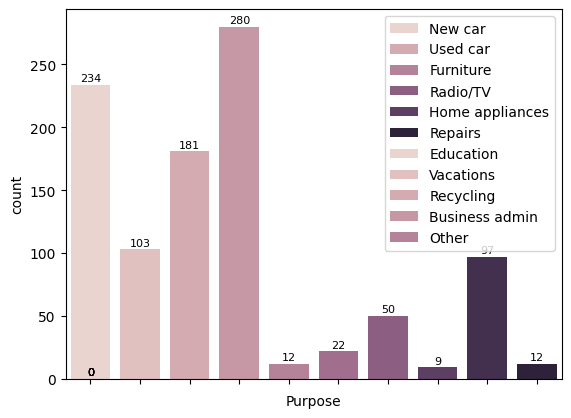

In [ ]:
# ---------------------------------- Purpose --------------------------------------

# Check for duplicate rows in the DataFrame and display the duplicated rows
df.duplicated()[df.duplicated() == True]

# Create a count plot to visualize the distribution of 'Purpose' values
# The hue parameter is set to 'Purpose' to differentiate the counts by purpose categories
plot = sns.countplot(x='Purpose', data=df, hue='Purpose')

# Add a legend to the plot to indicate what each color represents
# Each label corresponds to a different category in the 'Purpose' column
plot.legend(labels=['New car', 'Used car', 'Furniture', 'Radio/TV', 'Home appliances',
                    'Repairs', 'Education', 'Vacations', 'Recycling', 'Business admin', 'Other'])

# Add exact counts above the bars in the count plot
for patch in plot.patches:
    height = patch.get_height()  # Get the height of each bar (i.e., count)
    plot.text(
        patch.get_x() + patch.get_width() / 2.,  # X position of the text (center of the bar)
        height + 1,  # Y position of the text (slightly above the top of the bar)
        int(height),  # Text to display (the count value)
        ha='center',  # Horizontal alignment of the text
        va='bottom',  # Vertical alignment of the text
        fontsize=8,  # Font size of the text
        color='black'  # Color of the text
    )

# Set the x-axis tick labels to be empty
# This is useful if you want to remove the default tick labels and possibly add custom ones later
plot.set_xticklabels([])

# Display the plot
# This renders the plot and shows it in the output
plt.show()


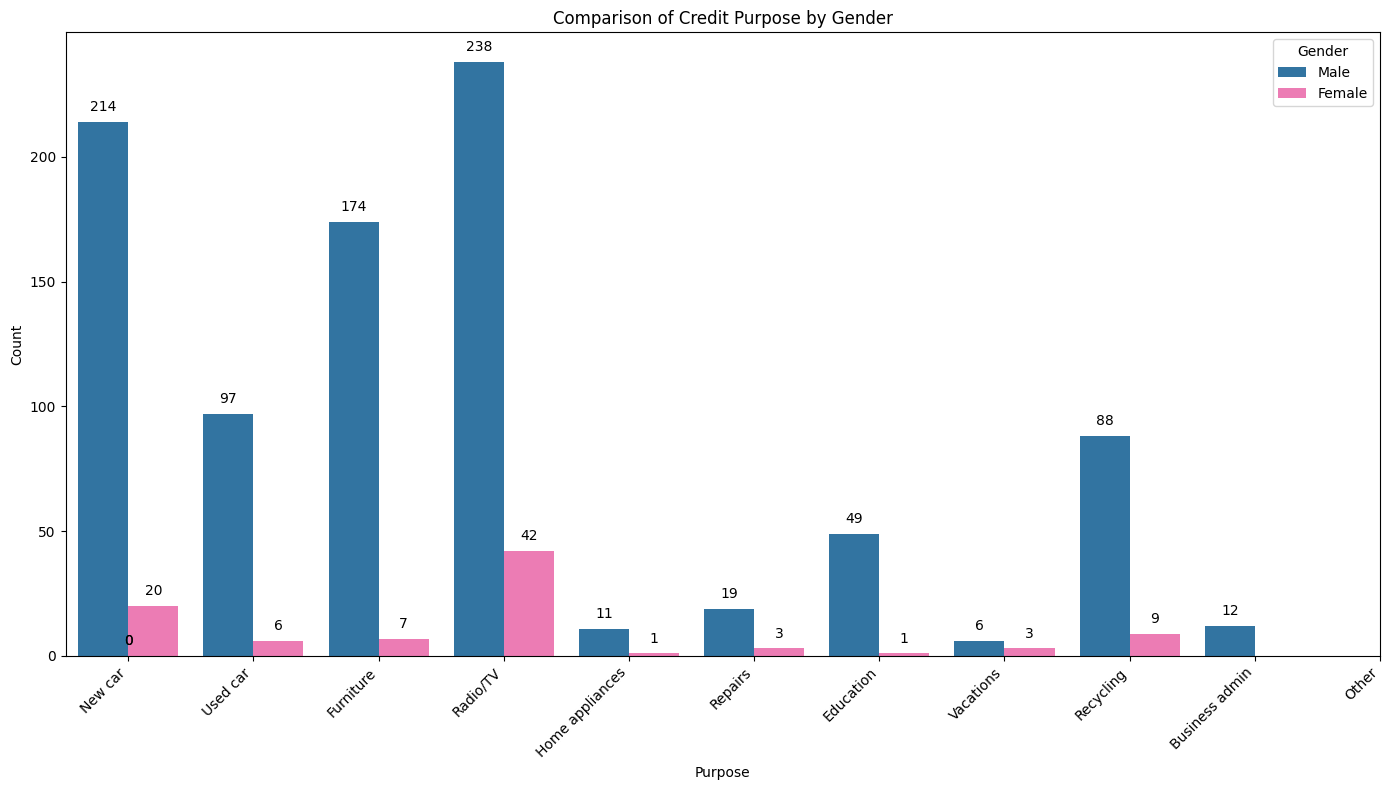

In [ ]:
#  -------------------------- Comparison of Credit Purpose by Gender --------------------------------------



# Remove any extra spaces from the column names to avoid any issues with column referencing
df.columns = df.columns.str.strip()

# Create a new column 'Gender' based on 'Sex & Marital Status'
# Mapping: 1, 2, 3 are mapped to 'Male' and 4 is mapped to 'Female'
df['Gender'] = df['Sex & Marital Status'].map({1: 'Male', 2: 'Male', 3: 'Male', 4: 'Female'})

# Define the purpose labels for better readability on the plot
purpose_labels = ['New car', 'Used car', 'Furniture', 'Radio/TV', 'Home appliances',
                  'Repairs', 'Education', 'Vacations', 'Recycling', 'Business admin', 'Other']

# Create a figure with a specific size for better visualization
plt.figure(figsize=(14, 8))

# Create a grouped bar plot using Seaborn's countplot
# The x-axis represents 'Purpose', the data is grouped by 'Gender' using different colors
plot = sns.countplot(x='Purpose', data=df, hue='Gender', palette=['#1f77b4', '#ff69b4'])

# Add a legend to the plot to indicate what each color represents
# 'Male' and 'Female' are the categories for gender
plot.legend(title='Gender', labels=['Male', 'Female'])

# Add exact counts above the bars for better clarity
# Loop through each bar in the plot to position the count text
for patch in plot.patches:
    height = patch.get_height()  # Get the height of the bar (i.e., count)
    # Add text annotation above each bar with the count value
    plot.text(
        patch.get_x() + patch.get_width() / 2.,  # X position is the center of the bar
        height + 6,  # Y position is a little above the bar
        int(height),  # Display the integer count
        ha='center',  # Horizontal alignment of the text
        va='center',  # Vertical alignment of the text
        fontsize=10,  # Font size of the text
        color='black'  # Color of the text
    )

# Set the x-axis labels to the defined purpose labels
# Set the ticks on the x-axis to match the number of categories
plot.set_xticks(range(len(purpose_labels)))  # Ensure there is one tick per category
plot.set_xticklabels(purpose_labels, rotation=45, ha='right')  # Rotate labels for better readability

# Add a title and labels to the axes for context
plt.title('Comparison of Credit Purpose by Gender')  # Title of the plot
plt.xlabel('Purpose')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis

# Adjust layout to ensure that labels and titles fit well
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# CONTINUE...COMPARAÇÃO ACCOUNT BALANCE POR CRÉDITO APROVADO OU NÃO